In [30]:
import os
# import drjit
gpu_num = 1 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
import pickle
import jammer
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')

from jammer.simulation_model import *
from jammer.utils import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy

(64, 14)


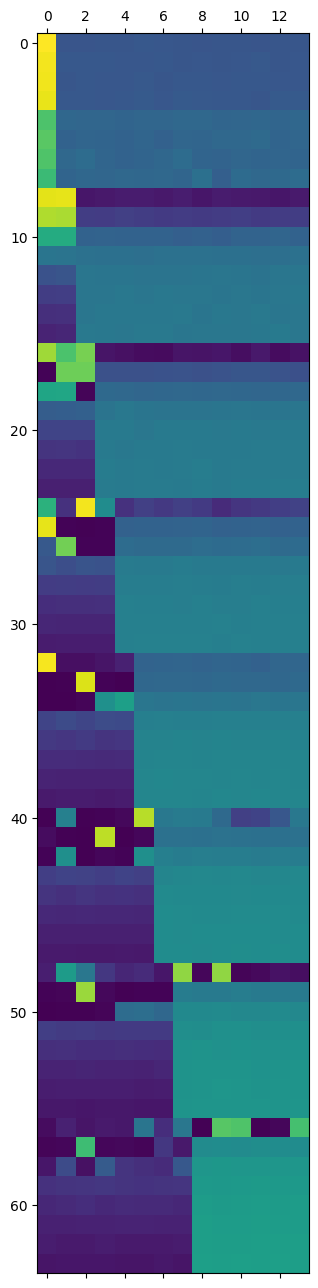

In [14]:
savename = "bers/paper/learning/grid_weights.csv"
num_ut = range(1, 9)
jammer_power = np.arange(-2.5, 15.1, 2.5, dtype=np.float32)
data = np.zeros((len(num_ut) * len(jammer_power), 14))
for i in range(len(num_ut)):
    for j in range(len(jammer_power)):
        n = num_ut[i]
        p = jammer_power[j]
        filename = f"weights/unmitigated/grid/ue_{n}_power_{p}dB.pickle"
        with open(filename, 'rb') as f:
            weights = pickle.load(f)[1]
        weights = MaxMeanSquareNorm()(weights)
        power_weights = np.square(np.abs(weights))
        data[i * len(jammer_power) + j, :] = weights[:,0]
data /= np.max(data)
print(data.shape)
plt.matshow(data)
np.savetxt(savename, data, delimiter=",")

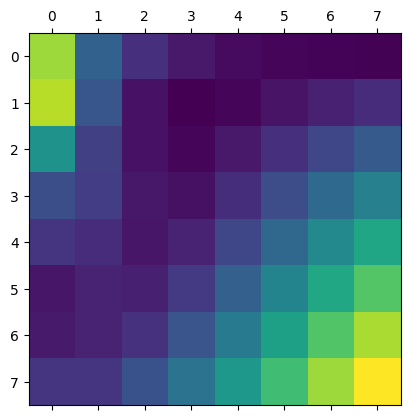

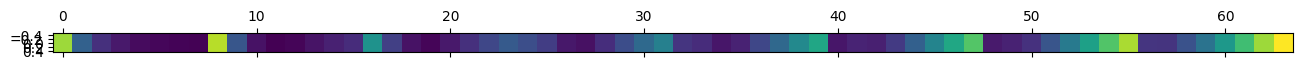

: 

In [46]:
# these are in same format as above (num_ut, jammer_power)
savename = "bers/paper/learning/grid_snr_comparison.csv"
with open("bers/report/learning/grid_snrs.pickle", "rb") as f0:
    bers_learned = pickle.load(f0)
with open("bers/report/learning/grid_snrs_uniform_jammer.pickle", "rb") as f1:
    bers_uniform = pickle.load(f1)

q = bers_learned / bers_uniform
plt.matshow(q)
q = q.flatten()
plt.matshow(q[np.newaxis,:])
# round to 2 decimal places
# q = np.round(q, 2)
# add indices
q = np.stack([np.arange(1, 65), q], axis=1)

np.savetxt(savename, q, delimiter=",", fmt='%.2f')

In [31]:
from pathlib import Path
exclude_list = [] #['bers/report/singular_values.pickle']
files = Path('bers/paper').glob('**/*.pickle')
for f in files:
    if str(f) not in exclude_list:
        print(f)

bers/paper/singular_values.pickle
bers/paper/time_pos_umi_nr_est_4ue.pickle
bers/paper/coded_bler.pickle
bers/paper/time_pos_umi_nr_est_4ue_1d_nulling.pickle
bers/paper/frequency/jammer_velocity_mitigation.pickle
bers/paper/frequency/mitigation_dim.pickle
bers/paper/frequency/ut_velocity_mitigation.pickle
bers/paper/frequency/mitigation_bler.pickle
bers/paper/learning/grid_snrs_uniform_jammer.pickle
bers/paper/learning/grid_long_snrs_1.pickle
bers/paper/learning/unmitigated_vs_pos.pickle
bers/paper/learning/learning_gains_ber.pickle
bers/paper/learning/grid_long_snrs_2.pickle


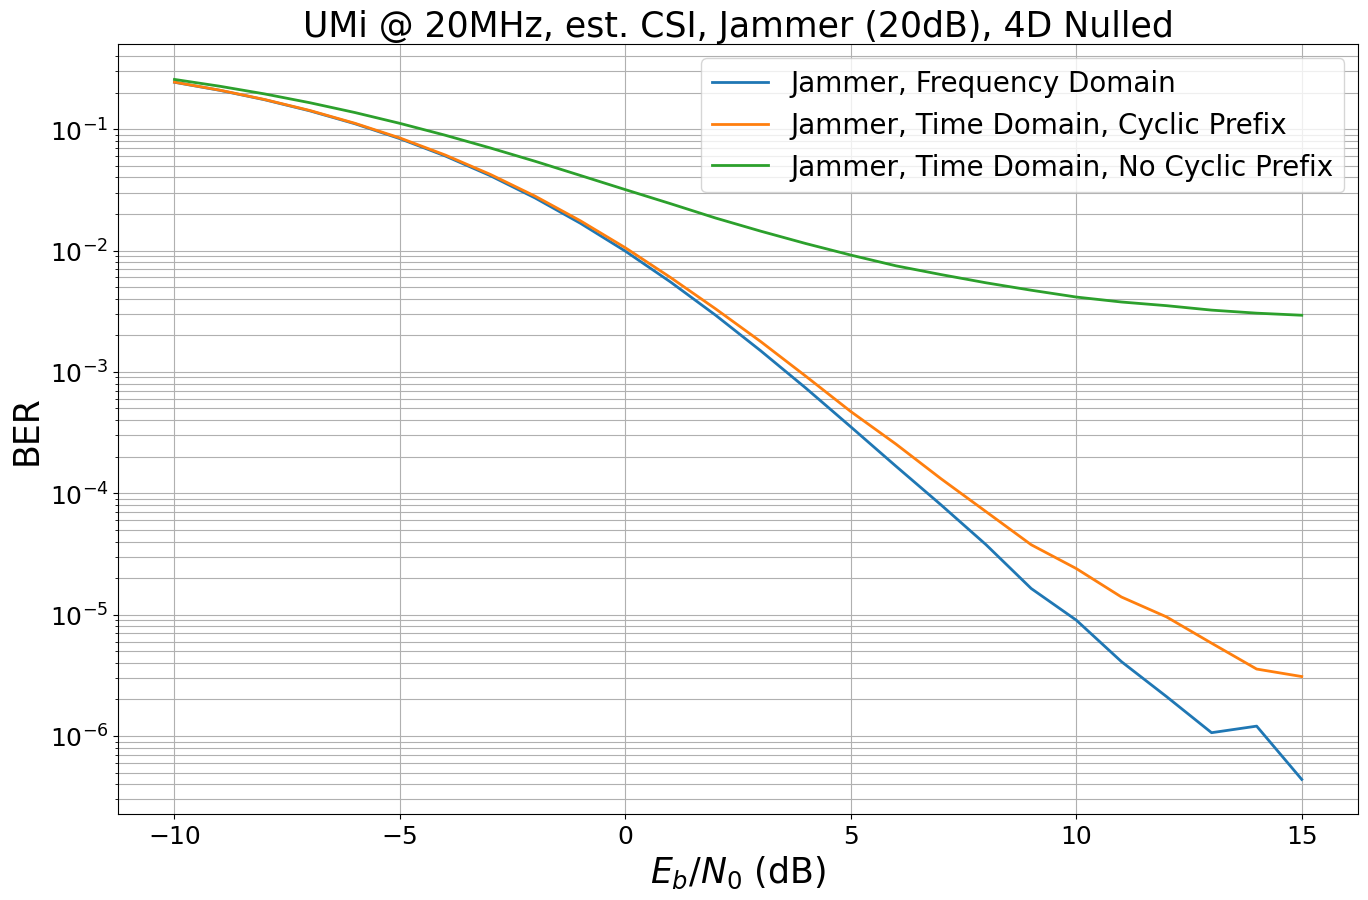

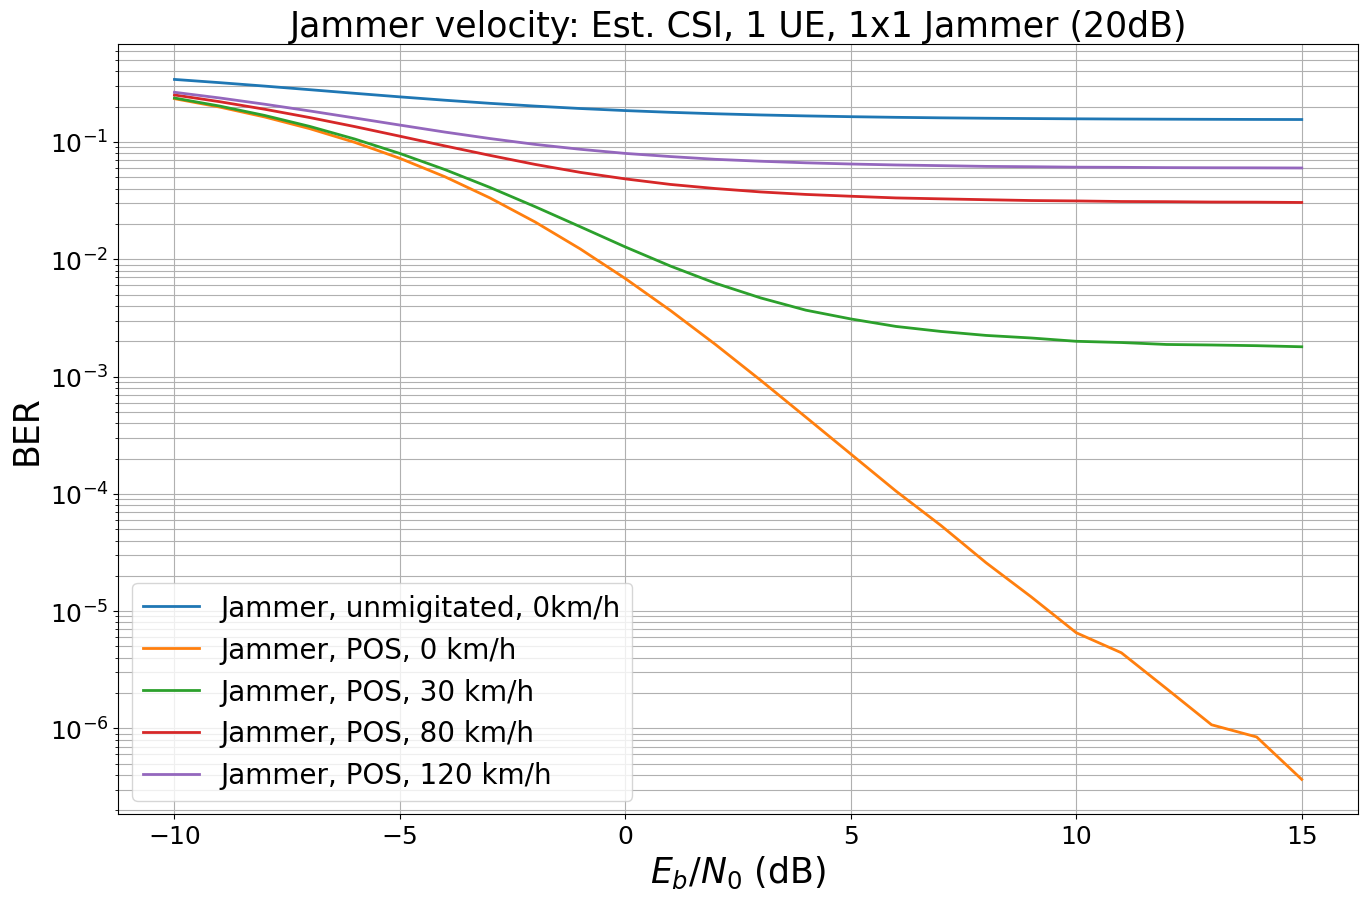

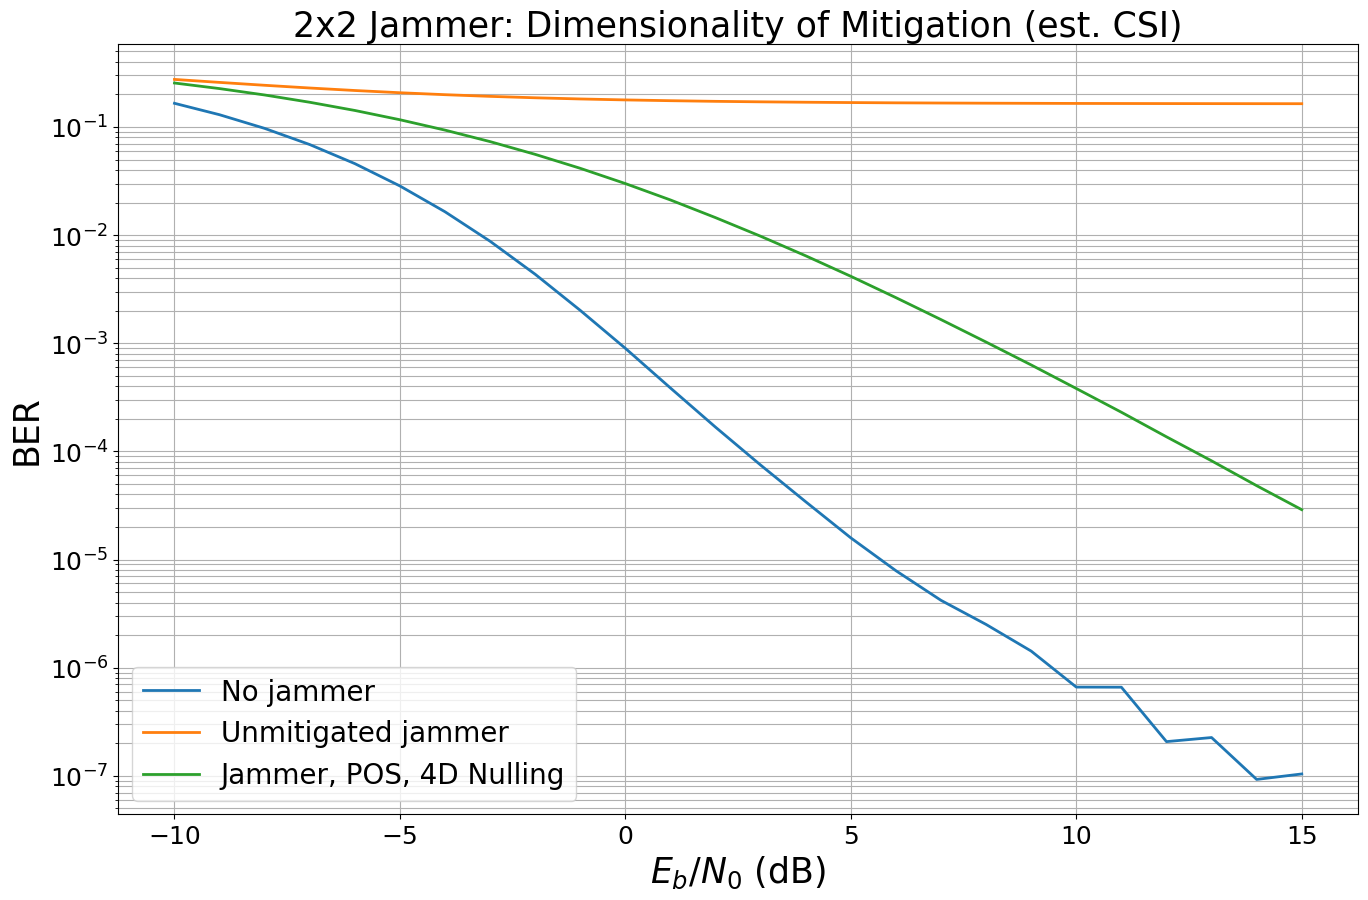

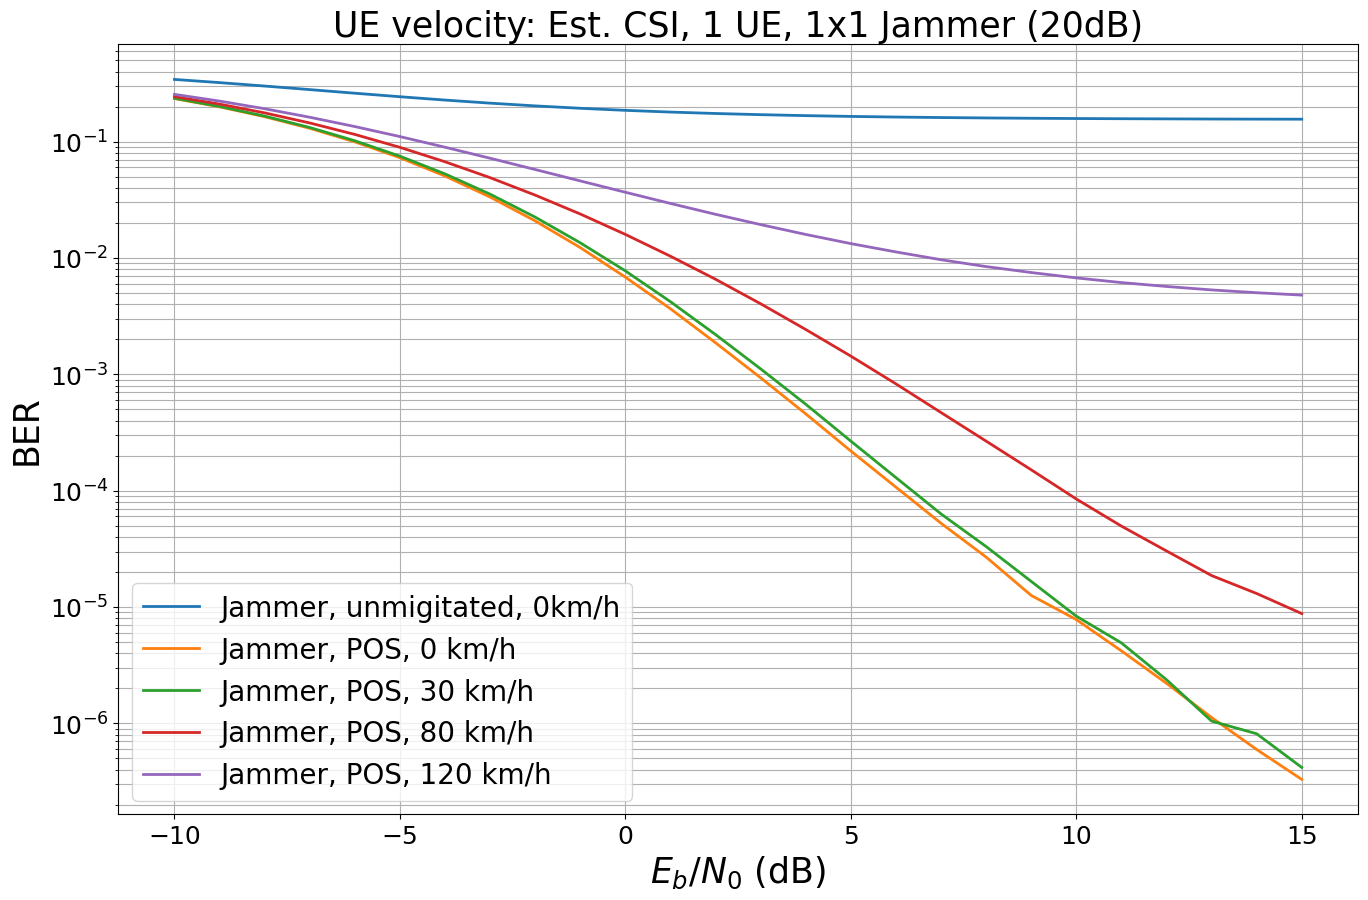

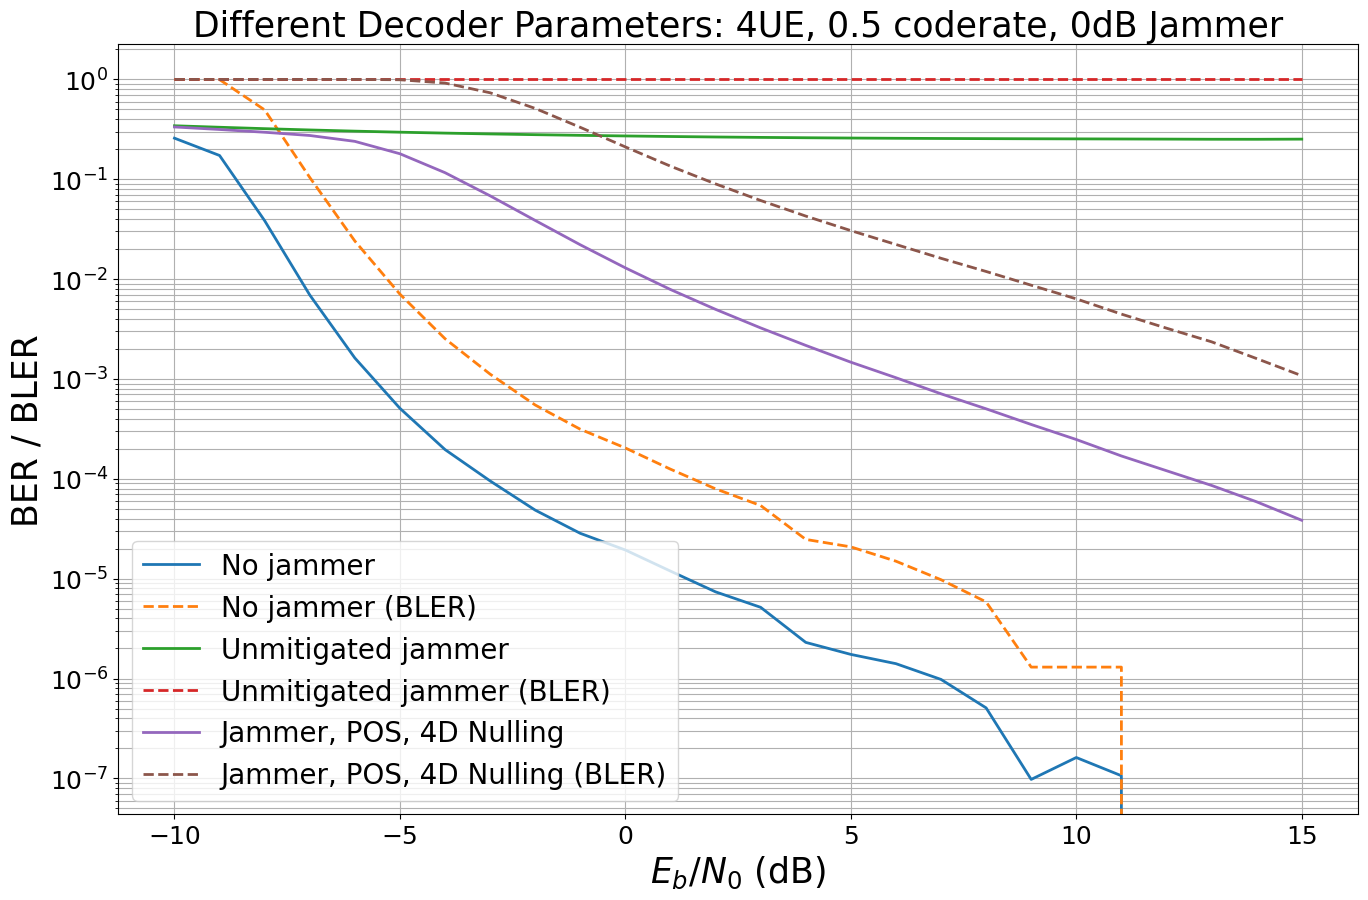

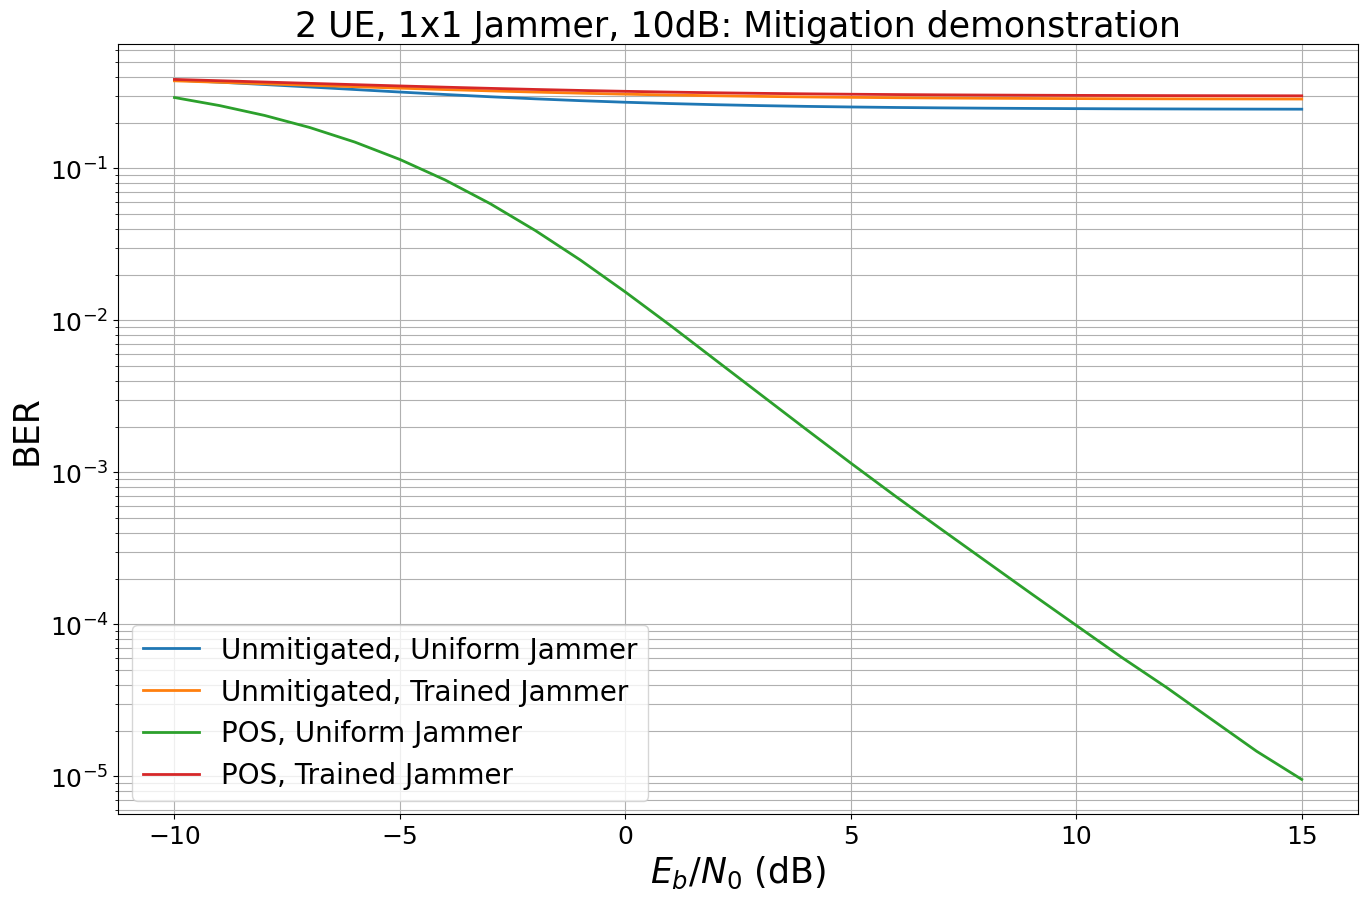

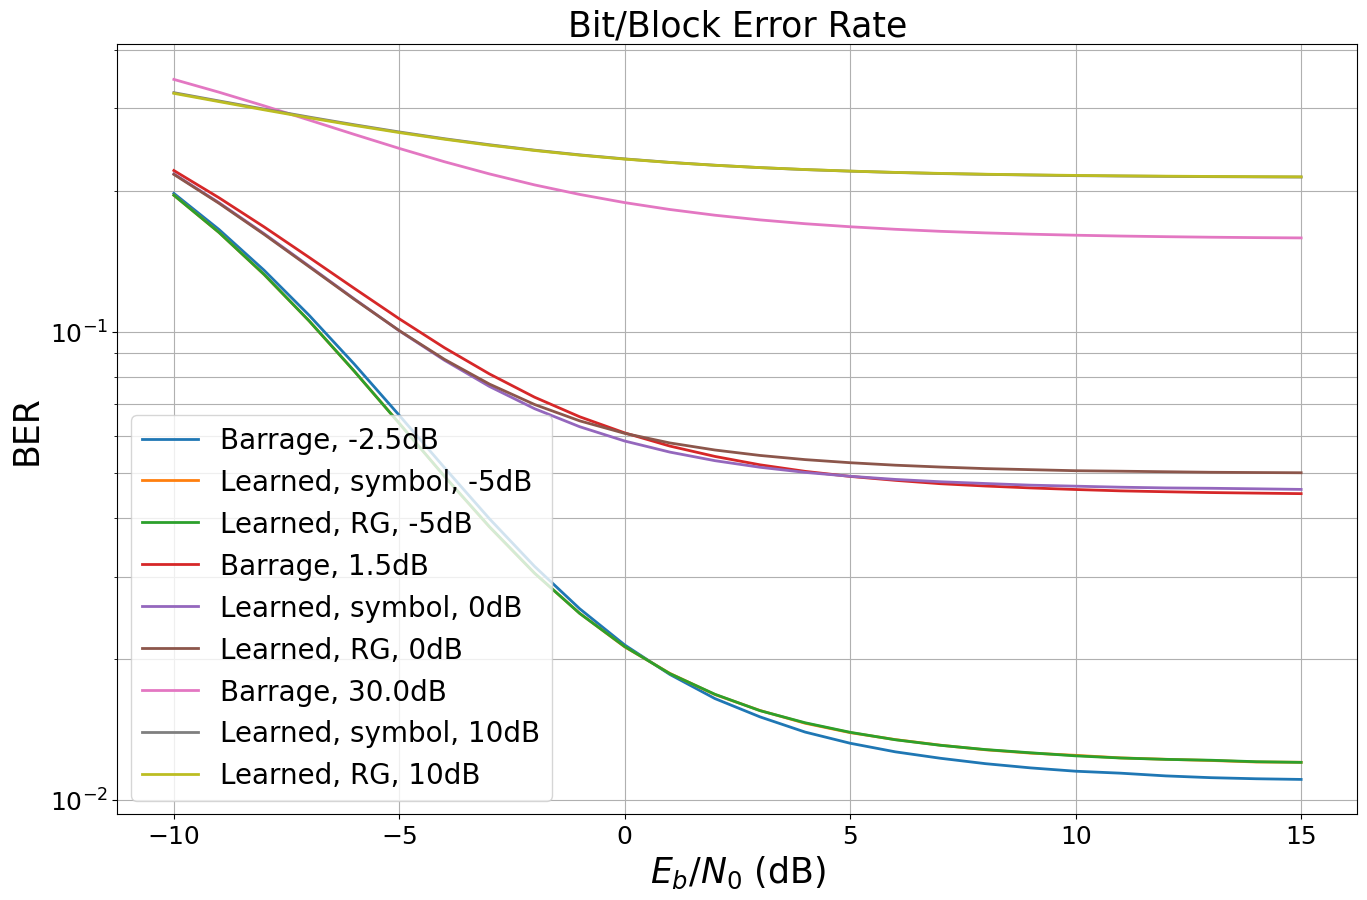

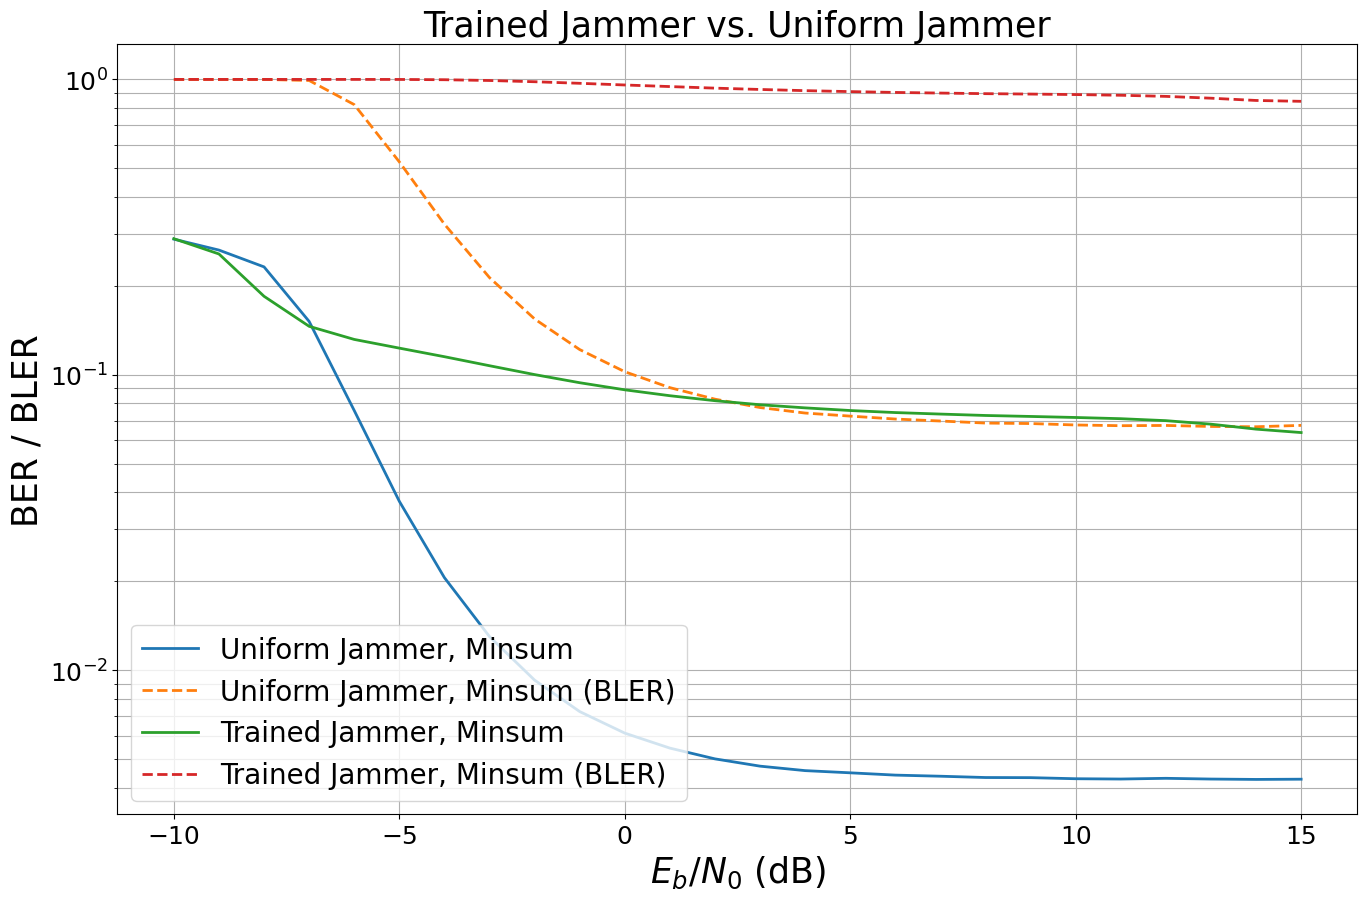

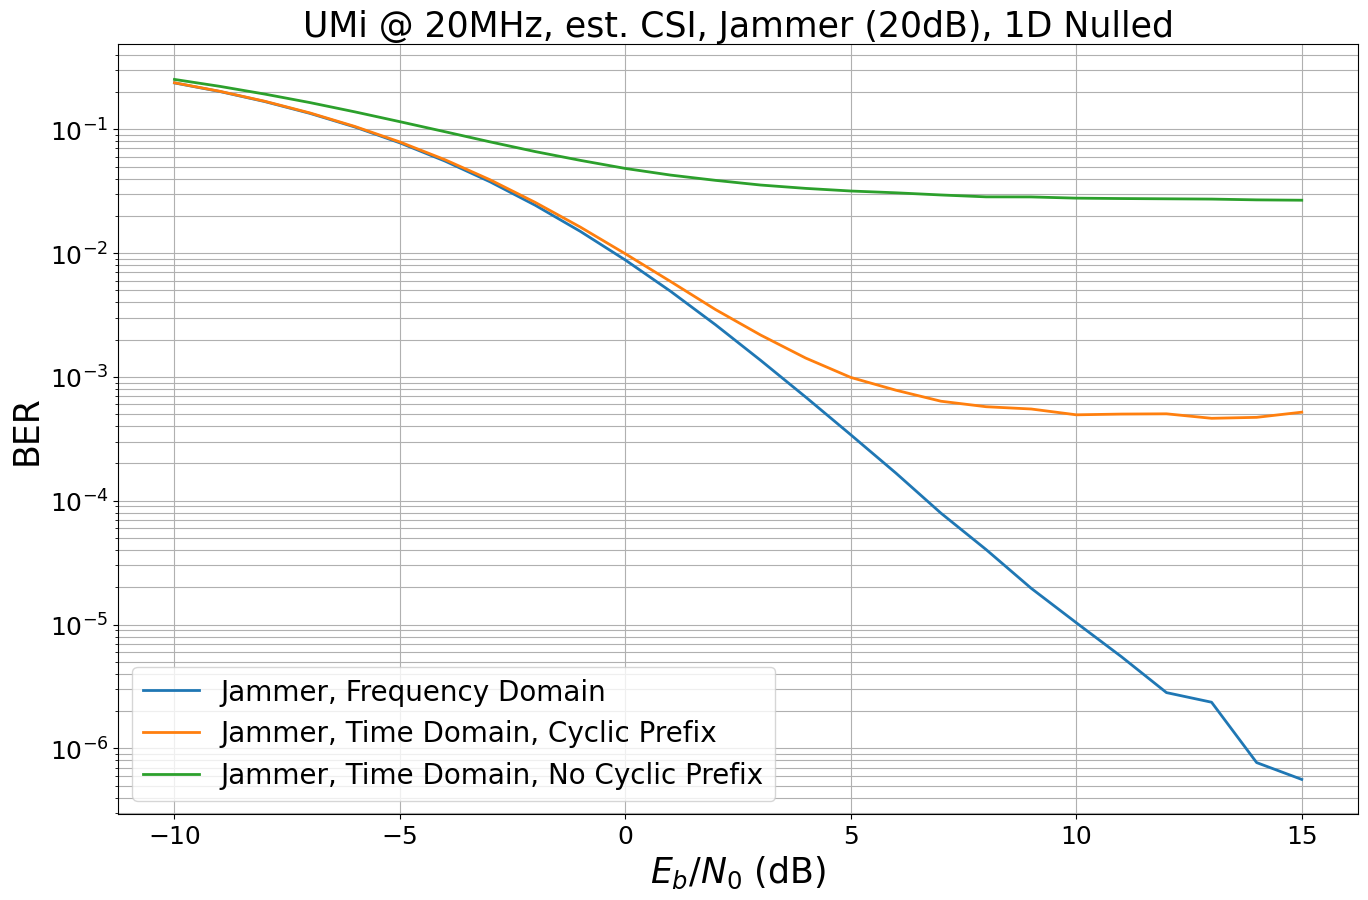

In [32]:
filenames = \
['bers/paper/time_pos_umi_nr_est_4ue.pickle',
'bers/paper/frequency/jammer_velocity_mitigation.pickle',
'bers/paper/frequency/mitigation_dim.pickle',
'bers/paper/frequency/ut_velocity_mitigation.pickle',
'bers/paper/frequency/mitigation_bler.pickle',
'bers/paper/learning/unmitigated_vs_pos.pickle',
'bers/paper/learning/learning_gains_ber.pickle',
'bers/paper/coded_bler.pickle',
'bers/paper/time_pos_umi_nr_est_4ue_1d_nulling.pickle']

for filename in filenames:
    with open(filename, 'rb') as f:
        ber = pickle.load(f)
    ber()

In [33]:
filenames = \
['bers/paper/time_pos_umi_nr_est_4ue.pickle',
'bers/paper/frequency/jammer_velocity_mitigation.pickle',
'bers/paper/frequency/mitigation_dim.pickle',
'bers/paper/frequency/ut_velocity_mitigation.pickle',
'bers/paper/frequency/mitigation_bler.pickle',
'bers/paper/learning/unmitigated_vs_pos.pickle',
'bers/paper/learning/learning_gains_ber.pickle',
'bers/paper/coded_bler.pickle',
'bers/paper/time_pos_umi_nr_est_4ue_1d_nulling.pickle']

from convert_to_csv import plotber_pickle_to_csv

# plotber_pickle_to_csv(filenames[0])
# plotber_pickle_to_csv(filenames[1])
# plotber_pickle_to_csv(filenames[2])
# plotber_pickle_to_csv(filenames[3])
# plotber_pickle_to_csv(filenames[5])
plotber_pickle_to_csv(filenames[8])

In [10]:
f = "bers/paper/singular_values.pickle"
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, "rb") as f:
    data = pickle.load(f)
print(data.keys())
new_data = {}
for k, v in data.items():
    mean, std = v
    new_key = k.replace(',','').replace(' ', '_')
    new_data[new_key + "_mean"] = mean
    new_data[new_key + "_std"] = std
    new_data[new_key + "_x"] = tf.math.minimum(mean, std)
from convert_to_csv import save_data
save_data("singular_values", new_data)

dict_keys(['no cp, NR', 'cp, NR'])


In [11]:
plotber_pickle_to_csv(filenames[4], save_ber=False, save_bler=True)

In [13]:
plotber_pickle_to_csv(filenames[6])

In [7]:
plotber_pickle_to_csv(filenames[7], save_ber=False, save_bler=True)

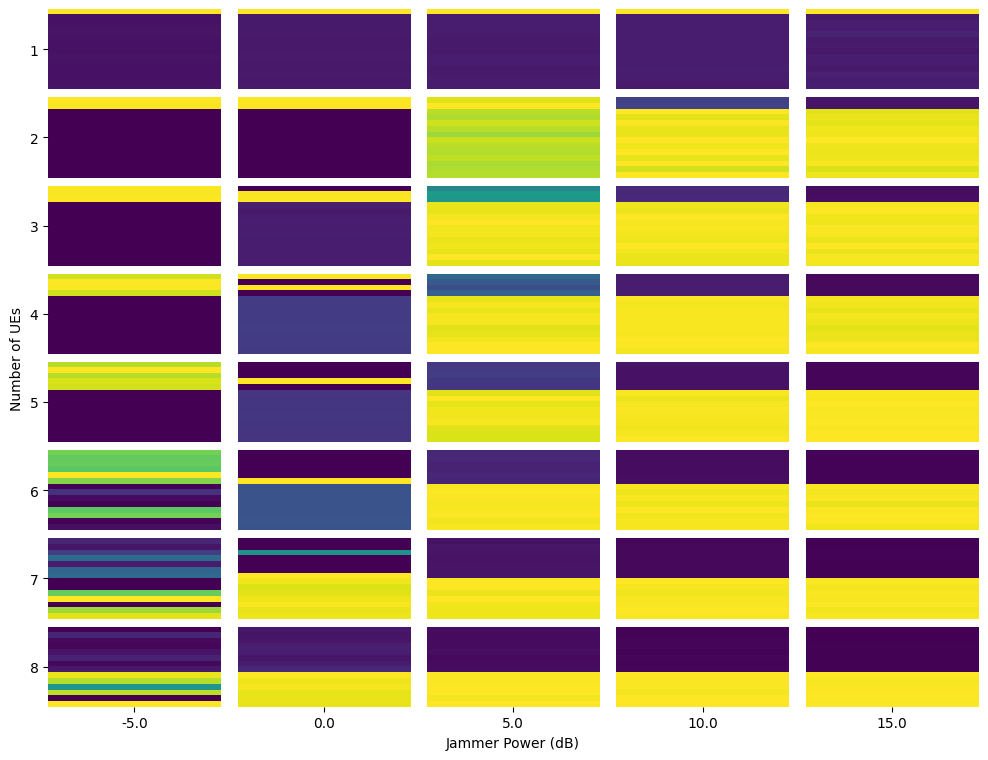

In [3]:
plt.figure(figsize=(10, 7.5))
num_ut = range(1, 9)
jammer_power = np.arange(-5, 15.1, 5, dtype=np.float32)
# jammer_power = np.arange(-5, 5.1, 5, dtype=np.float32)
bers = np.zeros([len(num_ut), len(jammer_power)])
for i in range(len(num_ut)):
    for j in range(len(jammer_power)):
        n = num_ut[i]
        p = jammer_power[j]
        # filename = f"weights/paper/grid/ue_{n}_power_{p}dB.pickle"
        # filename = f"weights/paper/grid2/ue_{n}_power_{p}dB.pickle"
        filename = f"weights/paper/grid_long/1/ue_{n}_power_{p}dB.pickle"
        with open(filename, 'rb') as f:
            weights = pickle.load(f)[1]
        weights = MaxMeanSquareNorm()(weights)
        plt.subplot(len(num_ut), len(jammer_power), i * len(jammer_power) + j + 1)
        plt.axis('off')
        # plt.imshow(weights, aspect='auto')
        plt.imshow(np.square(np.abs(weights)), aspect='auto', vmin=0)

# parameters: space between plots
wspace = 0.1
hspace = 0.1
m = len(num_ut)
n = len(jammer_power)
plt.subplots_adjust(bottom=0.07, top=1.0, left=0.07, right=1.0, wspace=wspace, hspace=hspace)
# labels on the x and y plots-axis
ax = plt.gcf().add_axes([0.07, 0.07, 0.93, 0.93], frameon=False)
plot_width = 1.0 / (n + (n - 1) * wspace)
gap_width = wspace * plot_width
ax.set_xticks(np.arange(plot_width / 2, 1.0, gap_width + plot_width), labels=jammer_power)
ax.set_xlabel("Jammer Power (dB)")
ax.invert_yaxis()
plot_height = 1.0 / (m + (m - 1) * hspace)
gap_height = hspace * plot_height
ax.set_yticks(plot_height / 2 + np.arange(m) * (gap_height + plot_height), labels=num_ut)
ax.set_ylabel("Number of UEs")

plt.show()

(40, 14)


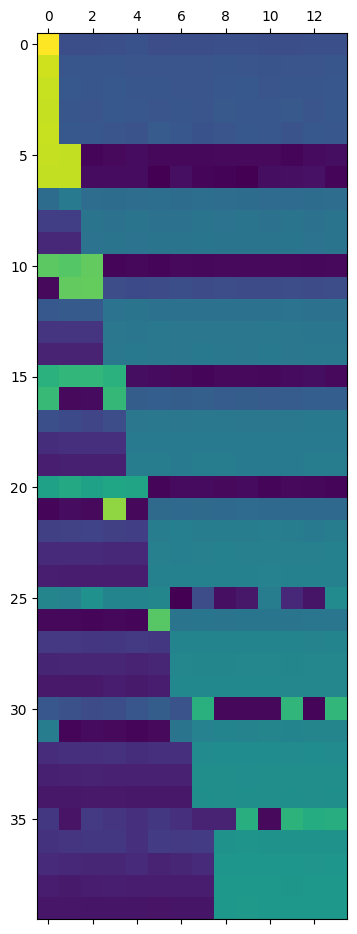

In [19]:
with open("bers/paper/learning/grid_long_snrs_1.pickle", "rb") as f1:
    bers_learned_1 = pickle.load(f1)
with open("bers/paper/learning/grid_long_snrs_2.pickle", "rb") as f2:
    bers_learned_2 = pickle.load(f2)
with open("bers/report/learning/grid_snrs_uniform_jammer.pickle", "rb") as f3:
    bers_uniform = pickle.load(f3)
bers_concat = np.stack([bers_learned_1, bers_learned_2], axis=0)
run_chosen = np.argmax(bers_concat, axis=0) + 1

savename = "bers/paper/learning/grid_weights_6.csv"
num_ut = range(1, 9)
jammer_power = np.arange(-5, 15.1, 5, dtype=np.float32)
data = np.zeros((len(num_ut) * len(jammer_power), 14))
for i in range(len(num_ut)):
    for j in range(len(jammer_power)):
        n = num_ut[i]
        p = jammer_power[j]
        filename = f"weights/paper/grid_long/{run_chosen[i][j]}/ue_{n}_power_{p}dB.pickle"
        with open(filename, 'rb') as f:
            weights = pickle.load(f)[1]
        weights = MaxMeanSquareNorm()(weights)
        power_weights = np.square(np.abs(weights))
        data[i * len(jammer_power) + j, :] = weights[:,0]
data /= np.max(data)
print(data.shape)
plt.matshow(data)
np.savetxt(savename, data, delimiter=",")

[[0 0 0 1 1]
 [0 1 1 0 0]
 [1 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [1 0 0 1 1]
 [1 1 1 0 0]
 [1 1 0 0 1]]
[7.18889931 1.72109441 1.16234907 1.04692697 1.01440116 6.26168492
 1.66084628 0.9998492  1.12192775 1.30230577 3.47883854 1.3915091
 1.03084605 1.32522188 1.65571595 2.13409592 1.23614133 1.11771041
 1.54828763 2.00598477 1.46507436 1.21786132 1.24603489 1.78652499
 2.33900492 1.10633921 1.16401645 1.42317242 2.02783974 2.65956671
 1.16696282 1.18645697 1.65315969 2.29588188 2.93897086 1.27619669
 1.40570115 1.90826003 2.56340811 3.20473077]


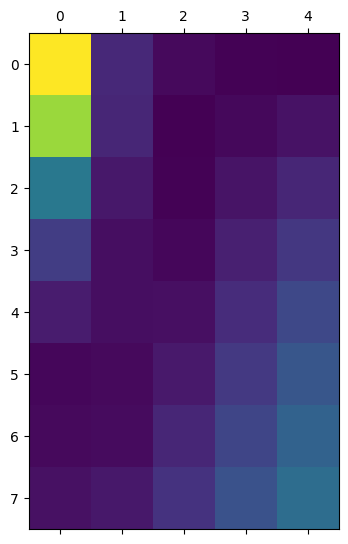

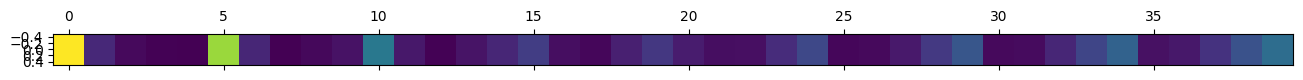

In [26]:
# these are in same format as above (num_ut, jammer_power)
savename = "bers/paper/learning/grid_snr_comparison_2.csv"
with open("bers/paper/learning/grid_long_snrs_1.pickle", "rb") as f1:
    bers_learned_1 = pickle.load(f1)
with open("bers/paper/learning/grid_long_snrs_2.pickle", "rb") as f2:
    bers_learned_2 = pickle.load(f2)
with open("bers/paper/learning/grid_snrs_uniform_jammer.pickle", "rb") as f3:
    bers_uniform = pickle.load(f3)

bers_concat = np.stack([bers_learned_1, bers_learned_2], axis=0)
run_chosen = np.argmax(bers_concat, axis=0)
print(run_chosen)

bers_learned = np.max(bers_concat, axis=0)

q = bers_learned / bers_uniform
plt.matshow(q)
q = q.flatten()
plt.matshow(q[np.newaxis,:])
print(q)
# q = np.stack([np.arange(1, 40), q], axis=1)

np.savetxt(savename, q, delimiter=",", fmt='%.2f')

[[1.0408193e-06]
 [3.3499098e-06]
 [7.4920818e-02]
 [7.6081283e-02]
 [4.5903623e-01]
 [4.7139677e-01]
 [4.6435061e-01]
 [4.7485408e-01]
 [4.6578252e-01]
 [4.5074227e-01]
 [4.7226420e-01]
 [4.4970018e-01]
 [4.5488876e-01]
 [4.6024740e-01]]


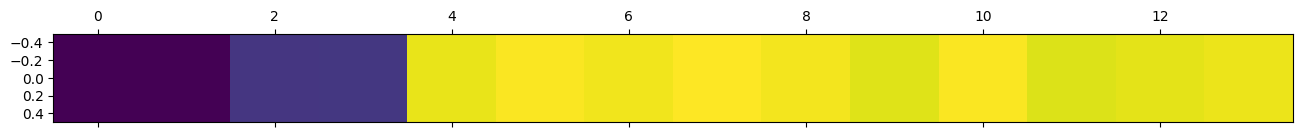

In [5]:
# this block is only needed for normalization
num_ut = range(1, 9)
jammer_power = np.arange(-5, 15.1, 5, dtype=np.float32)
data = np.zeros((len(num_ut) * len(jammer_power), 14))
for i in range(len(num_ut)):
    for j in range(len(jammer_power)):
        n = num_ut[i]
        p = jammer_power[j]
        filename = f"weights/paper/grid/ue_{n}_power_{p}dB.pickle"
        with open(filename, 'rb') as f:
            weights = pickle.load(f)[1]
        weights = MaxMeanSquareNorm()(weights)
        power_weights = np.square(np.abs(weights))
        data[i * len(jammer_power) + j, :] = weights[:,0]

with open("weights/paper/pos_ue_2_power_10.0dB.pickle", 'rb') as f:
    weights = pickle.load(f)[1]
weights = MaxMeanSquareNorm()(weights)
weights = np.square(np.abs(weights))
weights /= np.max(data)
plt.matshow(weights[tf.newaxis, :], vmin=0)
print(weights)
np.savetxt("csv/pos_weights.csv", weights, delimiter=",")

In [29]:
# this block is only needed for normalization
num_ut = range(1, 9)
jammer_power = np.arange(-5, 15.1, 5, dtype=np.float32)
data = np.zeros((len(num_ut) * len(jammer_power), 14))
for i in range(len(num_ut)):
    for j in range(len(jammer_power)):
        n = num_ut[i]
        p = jammer_power[j]
        filename = f"weights/paper/grid/ue_{n}_power_{p}dB.pickle"
        with open(filename, 'rb') as f:
            weights = pickle.load(f)[1]
        weights = MaxMeanSquareNorm()(weights)
        power_weights = np.square(np.abs(weights))
        data[i * len(jammer_power) + j, :] = weights[:,0]

for ue in [6,7,8]:
    with open(f"weights/paper/grid_exp/ue_{ue}_power_-5.0dB.pickle", 'rb') as f:
        weights = pickle.load(f)[1]
    weights = MaxMeanSquareNorm()(weights)
    weights = np.square(np.abs(weights))
    weights /= np.max(data)
    plt.matshow(weights[tf.newaxis, :], vmin=0)
    print(weights)

FileNotFoundError: [Errno 2] No such file or directory: 'weights/paper/grid_exp/ue_8_power_5.0dB.pickle'